# Chapter 2

In [5]:
from keras.datasets import mnist
import numpy as np

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
from keras import models, layers

In [9]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [10]:
network.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=['accuracy'])

In [13]:
train_images = train_images.reshape((60000, 28*28))
# now unrolled
train_images.shape

(60000, 784)

In [15]:
train_images = train_images.astype('float32') / 255
train_images[1:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [19]:
from keras.utils import to_categorical

In [20]:
train_labels[1:5]

array([0, 4, 1, 9], dtype=uint8)

In [21]:
# this is creating our vectorized output, so that the last layer of the network can 
# compare to a vector
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [22]:
train_labels[1:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [24]:
# train the network
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 2s 39us/step - loss: 1.4845 - accuracy: 0.6583
Epoch 2/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.5933 - accuracy: 0.8520
Epoch 3/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.4134 - accuracy: 0.8878
Epoch 4/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.3538 - accuracy: 0.9006
Epoch 5/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.3245 - accuracy: 0.9078


In [25]:
# get test set metrics
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test accuracy: {}".format(test_acc))

10000/10000 [==============================] - 0s 36us/step
test accuracy: 0.819599986076355


In [26]:
x = np.array(12)
x

array(12)

In [27]:
x.ndim

0

In [30]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 
train_images.shape

(60000, 28, 28)

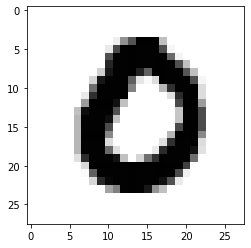

In [32]:
import matplotlib.pyplot as plt
digit = train_images[4565]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [33]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [34]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [35]:
my_slice = train_images[10:100, :28, :28]
my_slice.shape

(90, 28, 28)

In [39]:
# broadcasting
# smaller tensor is broadcast to become the shape of larger tensor by:
# 1. adding axes to smaller tensor to match ndim of larger
# 2. smaller tensor is repeated alongside new axes to match new shape (larger tensor)

x = np.random.random((64,3,32,10))
y = np.random.random((32, 10))

z = x + y
z.shape

(64, 3, 32, 10)

In [41]:
y = y.reshape((160,2))

In [42]:
y.shape

(160, 2)

In [43]:
np.transpose(y).shape

(2, 160)

# Chapter 3

In [101]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [47]:
train_data[100]

[1,
 13,
 244,
 6,
 87,
 337,
 7,
 628,
 2219,
 5,
 28,
 285,
 15,
 240,
 93,
 23,
 288,
 549,
 18,
 1455,
 673,
 4,
 241,
 534,
 3635,
 8448,
 20,
 38,
 54,
 13,
 258,
 46,
 44,
 14,
 13,
 1241,
 7258,
 12,
 5,
 5,
 51,
 9,
 14,
 45,
 6,
 762,
 7,
 2,
 1309,
 328,
 5,
 428,
 2473,
 15,
 26,
 1292,
 5,
 3939,
 6728,
 5,
 1960,
 279,
 13,
 92,
 124,
 803,
 52,
 21,
 279,
 14,
 9,
 43,
 6,
 762,
 7,
 595,
 15,
 16,
 2,
 23,
 4,
 1071,
 467,
 4,
 403,
 7,
 628,
 2219,
 8,
 97,
 6,
 171,
 3596,
 99,
 387,
 72,
 97,
 12,
 788,
 15,
 13,
 161,
 459,
 44,
 4,
 3939,
 1101,
 173,
 21,
 69,
 8,
 401,
 2,
 4,
 481,
 88,
 61,
 4731,
 238,
 28,
 32,
 11,
 32,
 14,
 9,
 6,
 545,
 1332,
 766,
 5,
 203,
 73,
 28,
 43,
 77,
 317,
 11,
 4,
 2,
 953,
 270,
 17,
 6,
 3616,
 13,
 545,
 386,
 25,
 92,
 1142,
 129,
 278,
 23,
 14,
 241,
 46,
 7,
 158]

In [48]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

1646592/1641221 [==============================] - 1s 0us/step


In [49]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [50]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[100]])

In [51]:
decoded_review

"? i am a great fan of david lynch and have everything that he's made on dvd except for hotel room the 2 hour twin peaks movie so when i found out about this i immediately grabbed it and and what is this it's a bunch of ? drawn black and white cartoons that are loud and foul mouthed and unfunny maybe i don't know what's good but maybe this is just a bunch of crap that was ? on the public under the name of david lynch to make a few bucks too let me make it clear that i didn't care about the foul language part but had to keep ? the sound because my neighbors might have all in all this is a highly disappointing release and may well have just been left in the ? box set as a curiosity i highly recommend you don't spend your money on this 2 out of 10"

In [54]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [53]:

type(train_data)

numpy.ndarray

In [65]:
counter = 0
for word in x_train[3453]:
    if word == 1:
        counter += 1
print(counter)

265


In [58]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [59]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [60]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [61]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [66]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [67]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [68]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 194us/step - loss: 0.4980 - accuracy: 0.7961 - val_loss: 0.3999 - val_accuracy: 0.8391
Epoch 2/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.2970 - accuracy: 0.9051 - val_loss: 0.3071 - val_accuracy: 0.8834
Epoch 3/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.2204 - accuracy: 0.9297 - val_loss: 0.3025 - val_accuracy: 0.8779
Epoch 4/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.1755 - accuracy: 0.9433 - val_loss: 0.3256 - val_accuracy: 0.8675
Epoch 5/20
15000/15000 [==============================] - 1s 80us/step - loss: 0.1437 - accuracy: 0.9556 - val_loss: 0.2882 - val_accuracy: 0.8857
Epoch 6/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.1176 - accuracy: 0.9647 - val_loss: 0.2990 - val_accuracy: 0.8841
Epoch 7/20
15000/15000 [==============================] - 1s 77us/s

In [69]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [70]:
history_dict['val_loss']

[0.3999382966518402,
 0.30714298725128175,
 0.3024681301116943,
 0.3255939254283905,
 0.2881885317802429,
 0.2989804238796234,
 0.3089079279899597,
 0.3304521150112152,
 0.37254408116340637,
 0.38387106647491454,
 0.4073437415122986,
 0.4428794921398163,
 0.4653176344394684,
 0.5006415961742401,
 0.5271126671314239,
 0.5638995726585389,
 0.5992101945877075,
 0.6427648873329163,
 0.6686490717887879,
 0.7218312227249145]

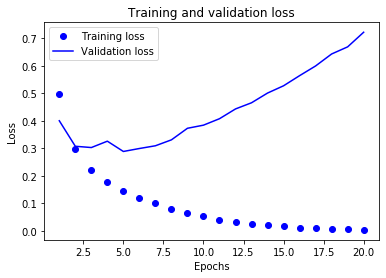

In [72]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

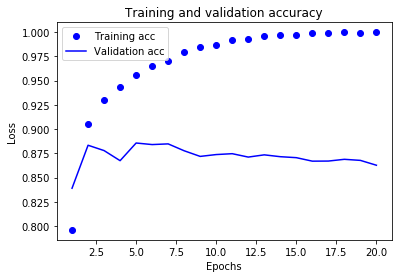

In [74]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [103]:

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [77]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [78]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [79]:
word_index

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [80]:
reverse_word_index

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [81]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [110]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [108]:
model = models.Sequential()
model.add(layers.Dense(164, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(164, activation='relu'))
model.add(layers.Dense(164, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [109]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [111]:
x_val = x_train[:500]
partial_x_train = x_train[500:]

y_val = one_hot_train_labels[:500]
partial_y_train = one_hot_train_labels[500:]


In [112]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 8482 samples, validate on 500 samples
Epoch 1/20
8482/8482 [==============================] - 1s 155us/step - loss: 2.1079 - accuracy: 0.5354 - val_loss: 1.3331 - val_accuracy: 0.6980
Epoch 2/20
8482/8482 [==============================] - 1s 144us/step - loss: 1.1082 - accuracy: 0.7443 - val_loss: 1.0377 - val_accuracy: 0.7800
Epoch 3/20
8482/8482 [==============================] - 1s 142us/step - loss: 0.7700 - accuracy: 0.8252 - val_loss: 0.9800 - val_accuracy: 0.7900
Epoch 4/20
8482/8482 [==============================] - 1s 143us/step - loss: 0.5242 - accuracy: 0.8806 - val_loss: 0.8768 - val_accuracy: 0.8160
Epoch 5/20
8482/8482 [==============================] - 1s 146us/step - loss: 0.4070 - accuracy: 0.9064 - val_loss: 0.8447 - val_accuracy: 0.8380
Epoch 6/20
8482/8482 [==============================] - 1s 148us/step - loss: 0.2692 - accuracy: 0.9383 - val_loss: 0.9330 - val_accuracy: 0.8260
Epoch 7/20
8482/8482 [==============================] - 1s 145us/step - loss:

In [97]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.1981300089047195

In [106]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [107]:
type(y_train)

numpy.ndarray

In [105]:
type(train_labels)

numpy.ndarray

# Chapter 4

In [113]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

In [116]:
train_images.shape

(60000, 28, 28)

In [130]:
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [129]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 25, 25, 128)       2176      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 64)        73792     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 112,896
Trainable params: 112,896
Non-trainable params: 0
_________________________________________________________________


In [131]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [132]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        73792     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)               

In [121]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [133]:

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=2, batch_size=64)

Epoch 1/2
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1569 - accuracy: 0.9497
Epoch 2/2
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0445 - accuracy: 0.9866


In [134]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 3s 318us/step


In [135]:
test_acc

0.9869999885559082

In [136]:
import os, shutil

In [139]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/Users/bwilke/Desktop/dogs-vs-cats/train'

# The directory where we will
# store our smaller dataset
base_dir = '/Users/bwilke/Desktop/dogs-vs-cats/cats_and_dogs_small'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [140]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [141]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [142]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)      

In [149]:
from keras import optimizers
model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [143]:

from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [144]:
def generation():
    i = 0
    while True:
        i+=1
        yield i

for item in generation():
    print(item)
    if item > 20:
        break

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [150]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
     validation_steps=50)

Epoch 1/30
100/100 [==============================] - 62s 616ms/step - loss: 0.6897 - acc: 0.5405 - val_loss: 0.6312 - val_acc: 0.5870
Epoch 2/30
100/100 [==============================] - 62s 623ms/step - loss: 0.6568 - acc: 0.6200 - val_loss: 0.6105 - val_acc: 0.5910
Epoch 3/30
100/100 [==============================] - 64s 644ms/step - loss: 0.6133 - acc: 0.6700 - val_loss: 0.5535 - val_acc: 0.6630
Epoch 4/30
100/100 [==============================] - 64s 636ms/step - loss: 0.5764 - acc: 0.7000 - val_loss: 0.5272 - val_acc: 0.6730
Epoch 5/30
100/100 [==============================] - 70s 702ms/step - loss: 0.5392 - acc: 0.7290 - val_loss: 0.6840 - val_acc: 0.6730
Epoch 6/30
100/100 [==============================] - 63s 635ms/step - loss: 0.5065 - acc: 0.7415 - val_loss: 0.5032 - val_acc: 0.6680
Epoch 7/30
100/100 [==============================] - 60s 603ms/step - loss: 0.4832 - acc: 0.7595 - val_loss: 0.6098 - val_acc: 0.6930
Epoch 8/30
100/100 [==============================] - 6

In [153]:
model.save('cats_and_dogs_small_1.h5')

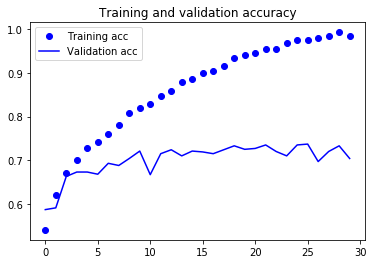

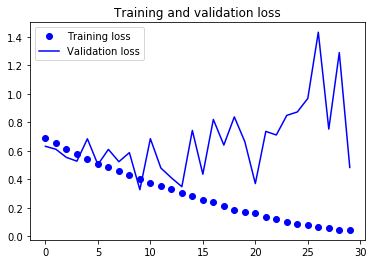

In [154]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [151]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

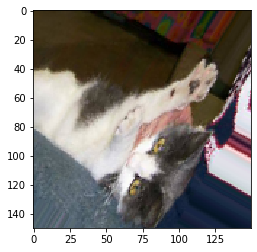

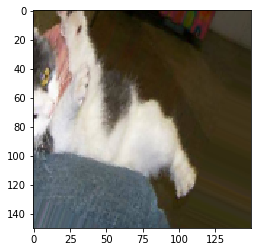

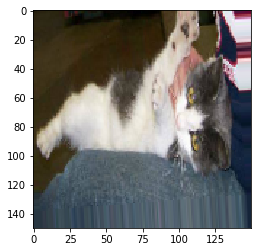

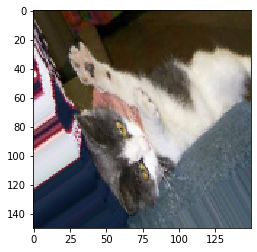

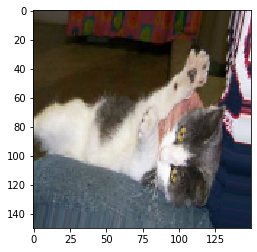

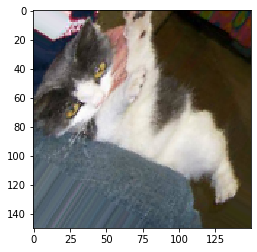

In [152]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[345]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 6 == 0:
        break

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

## Transfer Learning

In [155]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 25s 0us/step


In [156]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [157]:
base_dir = '/Users/bwilke/Desktop/dogs-vs-cats/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [158]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [159]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 783us/step - loss: 0.5970 - acc: 0.6735 - val_loss: 0.4477 - val_acc: 0.8330
Epoch 2/30
2000/2000 [==============================] - 1s 680us/step - loss: 0.4278 - acc: 0.8100 - val_loss: 0.3628 - val_acc: 0.8630
Epoch 3/30
2000/2000 [==============================] - 1s 697us/step - loss: 0.3595 - acc: 0.8425 - val_loss: 0.3241 - val_acc: 0.8770
Epoch 4/30
2000/2000 [==============================] - 1s 679us/step - loss: 0.3163 - acc: 0.8750 - val_loss: 0.3021 - val_acc: 0.8830
Epoch 5/30
2000/2000 [==============================] - 1s 677us/step - loss: 0.2845 - acc: 0.8835 - val_loss: 0.2853 - val_acc: 0.8890
Epoch 6/30
2000/2000 [==============================] - 1s 665us/step - loss: 0.2645 - acc: 0.8865 - val_loss: 0.2728 - val_acc: 0.8900
Epoch 7/30
2000/2000 [==============================] - 1s 650us/step - loss: 0.2533 - acc: 0.9005 - val_loss: 0.2669 - val_acc: 0.8960


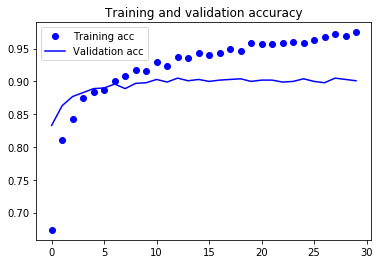

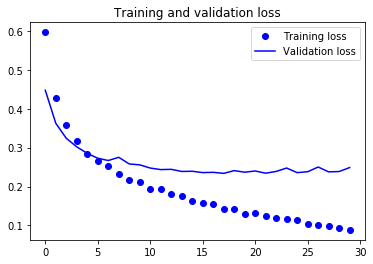

In [160]:

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [162]:
from keras.models import load_model

model = load_model('cats_and_dogs_small_1.h5')
model.summary()  # As a reminder.

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)      

In [168]:
img_path = '/Users/bwilke/Desktop/dogs-vs-cats/cats_and_dogs_small/test/dogs/dog.1535.jpg'

# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
print(img_tensor.shape)
img_tensor = np.expand_dims(img_tensor, axis=0)

# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(150, 150, 3)
(1, 150, 150, 3)


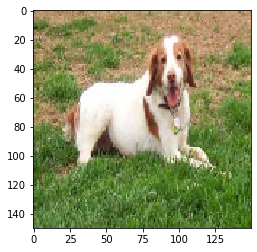

In [169]:
plt.imshow(img_tensor[0])
plt.show()

In [170]:

from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [171]:
layer_outputs

[<tf.Tensor 'conv2d_13_1/Relu:0' shape=(None, 148, 148, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d_9_1/MaxPool:0' shape=(None, 74, 74, 32) dtype=float32>,
 <tf.Tensor 'conv2d_14_1/Relu:0' shape=(None, 72, 72, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_10_1/MaxPool:0' shape=(None, 36, 36, 64) dtype=float32>,
 <tf.Tensor 'conv2d_15_1/Relu:0' shape=(None, 34, 34, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_11_1/MaxPool:0' shape=(None, 17, 17, 128) dtype=float32>,
 <tf.Tensor 'conv2d_16_1/Relu:0' shape=(None, 15, 15, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_12_1/MaxPool:0' shape=(None, 7, 7, 128) dtype=float32>]

In [172]:
model.input

<tf.Tensor 'conv2d_13_input_1:0' shape=(None, 150, 150, 3) dtype=float32>

(1, 148, 148, 32)


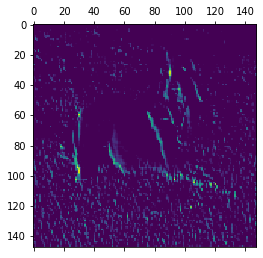

In [176]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 24], cmap='viridis')
plt.show()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


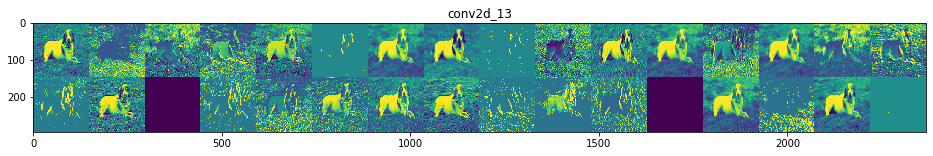

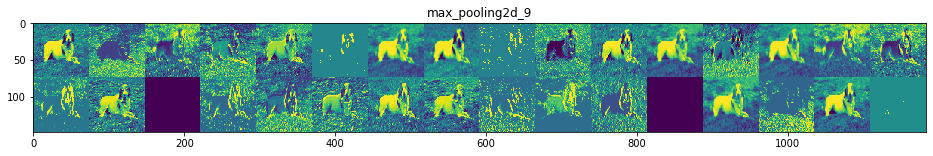

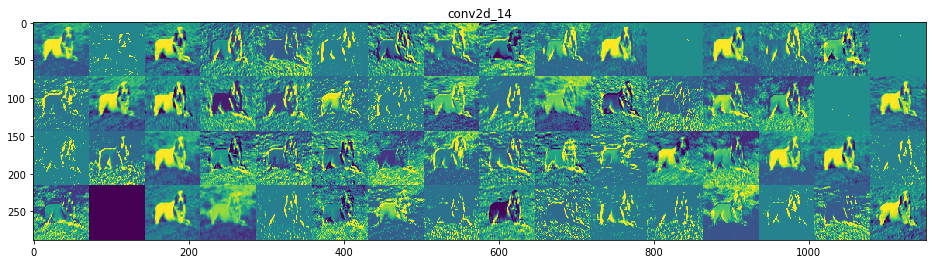

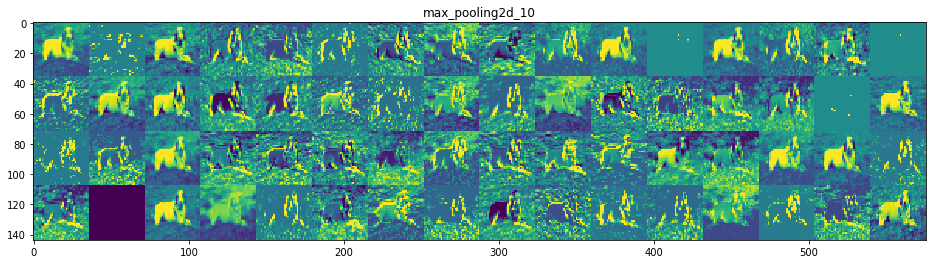

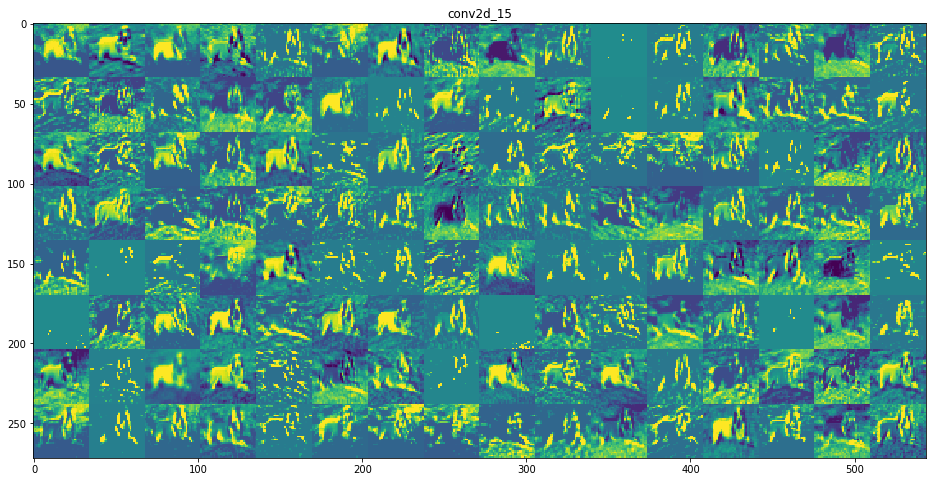

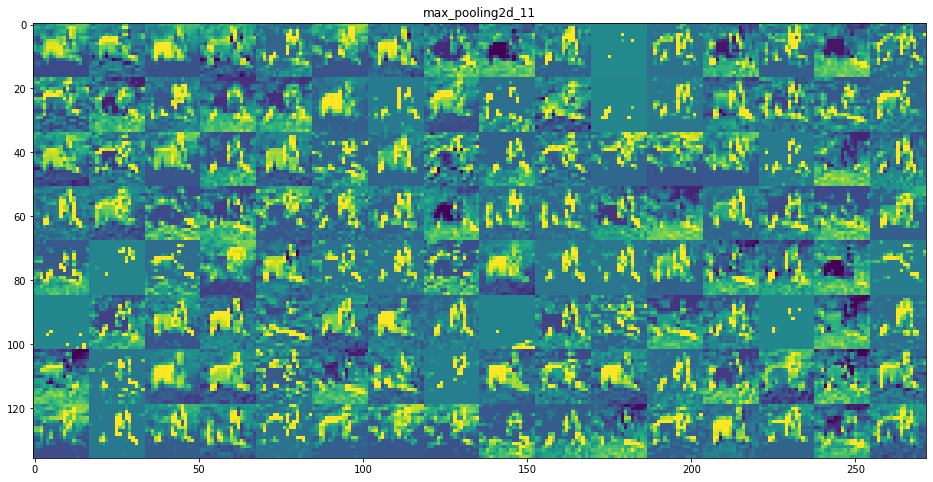

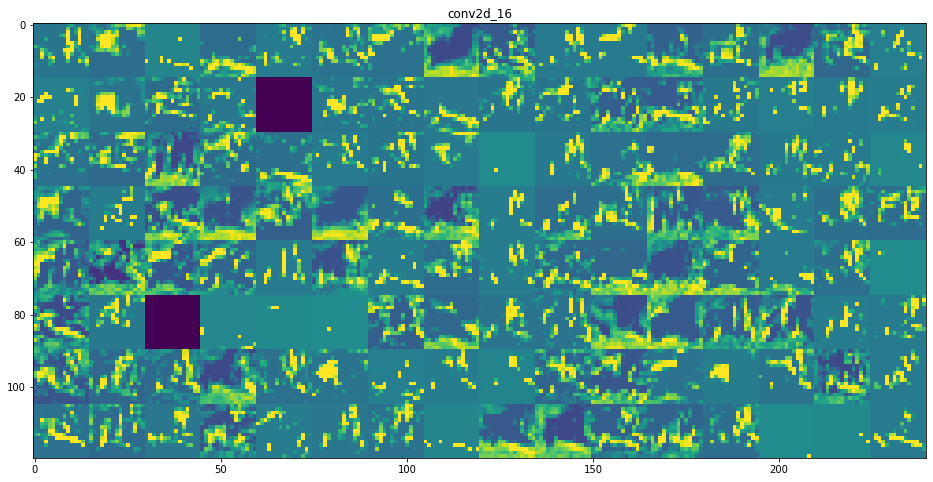

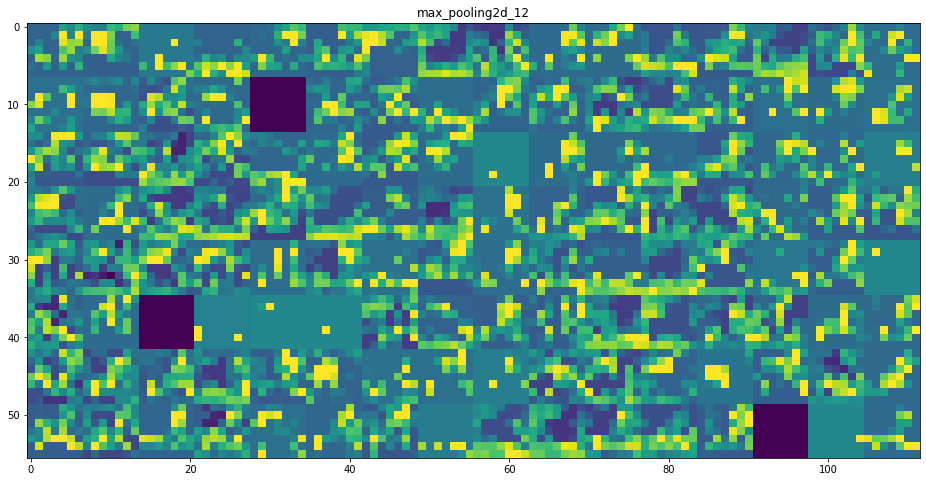

In [177]:
# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()